In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#한글설정
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('df_std.csv',encoding='euc-kr')
df_based=df.copy()
# gid remove
df.drop(columns='gid',inplace=True)
df.head()

,pa,ep,fp,yp,cctv,light,nb
0,0.757896,0.238218,0.178516,0.0,0.000000,0.592419,0.250172
1,0.749224,0.000000,0.000000,0.0,0.000000,0.735251,0.250172
2,0.749224,0.000000,0.000000,0.0,0.000000,0.655714,0.250172
3,0.749224,0.000000,0.000000,0.0,0.000000,0.628545,0.320499
4,0.727538,0.000000,0.000000,0.0,0.529358,0.539505,0.363463


In [11]:


print(get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score

X = df

# DBSCAN 모델 생성
dbscan = DBSCAN()

# 탐색할 매개변수 그리드 생성
param_grid = {
    'eps': [0.01, 0.001, 0.1],
    'min_samples': [1, 5, 10]
}

# Silhouette 스코어 메트릭 함수 생성
silhouette_scorer = make_scorer(silhouette_score)

# Grid Search 수행
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, scoring=silhouette_scorer)

# 데이터에 대해 Grid Search 수행
grid_search.fit(X)

# 최적의 매개변수와 그에 해당하는 모델 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Model:", grid_search.best_estimator_)


Best Parameters: {'eps': 0.01, 'min_samples': 1}
Best Model: DBSCAN(eps=0.01, min_samples=1)


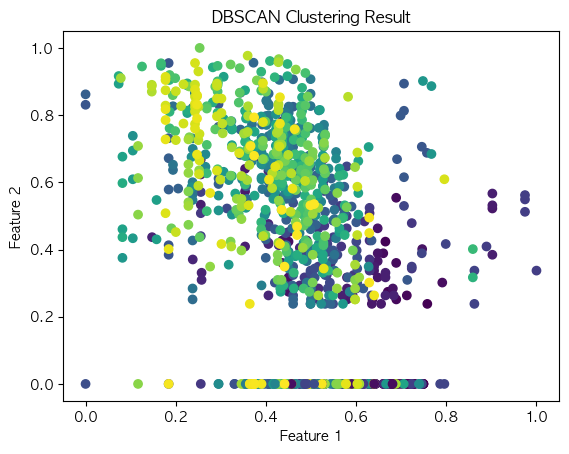

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# 데이터 준비
X = df.values

# DBSCAN 군집화 수행
dbscan = DBSCAN(eps=0.01, min_samples=1)
cluster_labels = dbscan.fit_predict(X)

# 군집 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering Result')
plt.show()